# Modelos de regresión clásico y redes neuronales profundas

In [1]:
#Preparación y análisis de datos
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Preprocesamiento
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#Modelado y evaluación
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error

### Análisis y acondicionamiento del dataset

In [2]:
#Importación y muestra del dataframe
df=pd.read_csv("garments_worker_productivity.csv")
df.sample(8)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
1171,3/10/2015,Quarter2,finishing,Tuesday,7,0.5,3.90,NaN,960,0,0.0,0,0,8.0,0.560625
84,1/6/2015,Quarter1,finishing,Tuesday,1,0.8,3.94,NaN,1440,0,0.0,0,0,8.0,0.936496
660,2/8/2015,Quarter2,finishing,Sunday,1,0.8,3.94,NaN,1200,0,0.0,0,0,10.0,0.893067
366,1/21/2015,Quarter3,finishing,Wednesday,8,0.8,2.90,NaN,2400,0,0.0,0,0,8.0,0.594872
710,2/10/2015,Quarter2,sweing,Tuesday,8,0.5,30.10,1061.0,6960,30,0.0,0,1,58.0,0.393549
253,1/14/2015,Quarter2,sweing,Wednesday,4,0.6,22.40,816.0,5100,23,0.0,0,0,57.0,0.600370
921,2/24/2015,Quarter4,sweing,Tuesday,1,0.6,22.53,708.0,5040,0,0.0,0,1,42.0,0.268214
392,1/22/2015,Quarter4,finishing,Thursday,12,0.6,4.08,NaN,5400,0,0.0,0,0,9.0,0.327407


In [3]:
df[['quarter', 'department']]

,quarter,department
0,Quarter1,sweing
1,Quarter1,finishing
2,Quarter1,sweing
3,Quarter1,sweing
4,Quarter1,sweing
...,...,...
1192,Quarter2,finishing
1193,Quarter2,finishing
1194,Quarter2,finishing
1195,Quarter2,finishing


In [4]:
#Dimensión del dataframe
df.shape

(1197, 15)

In [5]:
#Información del datafram y sus atributos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [6]:
#Cantidad de valores nulos en el dataframe
df.isna().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [7]:
#Se remplazan valores nulos con la media del atributo al que pertenece
df['wip']=df['wip'].fillna(df['wip'].mean())

In [8]:
#Estadísticos del dataframe después de eliminar nulos
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
date,1197,59,1/31/2015,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
quarter,1197,5,Quarter1,360,NaN,NaN,NaN,NaN,NaN,NaN,NaN
department,1197,3,sweing,691,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,1197,6,Wednesday,208,NaN,NaN,NaN,NaN,NaN,NaN,NaN
team,1197.0,NaN,NaN,NaN,6.426901,3.463963,1.0,3.0,6.0,9.0,12.0
targeted_productivity,1197.0,NaN,NaN,NaN,0.729632,0.097891,0.07,0.7,0.75,0.8,0.8
smv,1197.0,NaN,NaN,NaN,15.062172,10.943219,2.9,3.94,15.26,24.26,54.56
wip,1197.0,NaN,NaN,NaN,1190.465991,1395.647261,7.0,970.0,1190.465991,1190.465991,23122.0
over_time,1197.0,NaN,NaN,NaN,4567.460317,3348.823563,0.0,1440.0,3960.0,6960.0,25920.0
incentive,1197.0,NaN,NaN,NaN,38.210526,160.182643,0.0,0.0,0.0,50.0,3600.0


In [9]:
#Se muestran posibles de atributos categóricos: department, quarter, day
print(df['department'].value_counts().index.to_list())
print(df['quarter'].value_counts().index.to_list())
print(df['day'].value_counts().index.to_list())

['sweing', 'finishing ', 'finishing']
['Quarter1', 'Quarter2', 'Quarter4', 'Quarter3', 'Quarter5']
['Wednesday', 'Sunday', 'Tuesday', 'Thursday', 'Monday', 'Saturday']


In [10]:
#Normalización de los valores de los atributos categóricos
df['department'] = df['department'].replace(['sweing'],['sewing'])
df['department'] = df['department'].replace(['finishing '],['finishing'])

<AxesSubplot:title={'center':'Distribucion actual_productivity'}, ylabel='Frequency'>

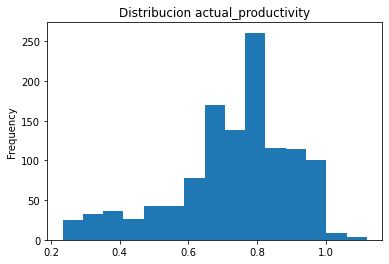

In [11]:
#Se grafica la distribución del atributo de salida
df['actual_productivity'].plot.hist(bins=15,title='Distribucion actual_productivity')

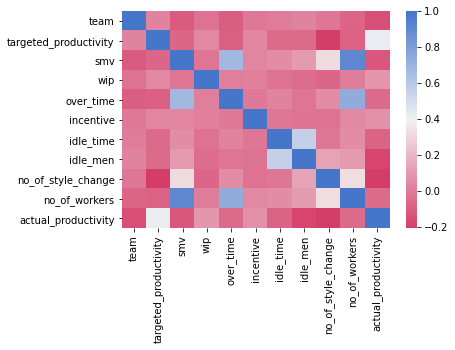

In [12]:
#Se observa gráficamente posible correlación entre los atributos
cmap = sns.diverging_palette(0, 255, as_cmap=True)
sns.heatmap(df.corr(), cmap=cmap)
plt.show()

## Regresión lineal

In [13]:
#Se hace una copia del df para conservar el conjunto trabajado
data_r=df.copy()

In [14]:
#Se definen los atributos con valores de entrada y de salida
Xr=data_r.drop(axis=1,columns=['date','quarter','department','day','actual_productivity'])
yr=data_r[['actual_productivity']]

In [15]:
#Se obtienen valores estadísticos del conjunto seleccionado como entrada
Xr.describe().T

,count,mean,std,min,25%,50%,75%,max
team,1197.0,6.426901,3.463963,1.00,3.00,6.000000,9.000000,12.00
targeted_productivity,1197.0,0.729632,0.097891,0.07,0.70,0.750000,0.800000,0.80
smv,1197.0,15.062172,10.943219,2.90,3.94,15.260000,24.260000,54.56
wip,1197.0,1190.465991,1395.647261,7.00,970.00,1190.465991,1190.465991,23122.00
over_time,1197.0,4567.460317,3348.823563,0.00,1440.00,3960.000000,6960.000000,25920.00
incentive,1197.0,38.210526,160.182643,0.00,0.00,0.000000,50.000000,3600.00
idle_time,1197.0,0.730159,12.709757,0.00,0.00,0.000000,0.000000,300.00
idle_men,1197.0,0.369256,3.268987,0.00,0.00,0.000000,0.000000,45.00
no_of_style_change,1197.0,0.150376,0.427848,0.00,0.00,0.000000,0.000000,2.00
no_of_workers,1197.0,34.609858,22.197687,2.00,9.00,34.000000,57.000000,89.00


In [16]:
#Se procede a normalizar los valores de entrada y se separan los conjuntos nuevamente en entrenamiento y prueba
s = StandardScaler()
Xr_esc = s.fit_transform(Xr)

Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr_esc, yr, test_size=0.25, random_state=1)

In [17]:
#Se define y entrena el modelo
model_rl=LinearRegression()
model_rl.fit(Xr_train,yr_train)

LinearRegression()

In [18]:
#Se generan predicciones con los datos de entrenamiento y prueba
yr_rl_pred_train = model_rl.predict(Xr_train)
yr_rl_pred_test = model_rl.predict(Xr_test)

In [19]:
#Se muestran los valores de MSE de los datos de entrenamiento y prueba
mse_rl_train = mean_squared_error(yr_rl_pred_train, yr_train)
print('Error de entrenamiento (MSE): ', mse_rl_train)
mse_rl_test = mean_squared_error(yr_rl_pred_test, yr_test)
print('Error de prueba (MSE): ', mse_rl_test)

Error de entrenamiento (MSE):  0.02032637332963137
Error de prueba (MSE):  0.02686282520346866


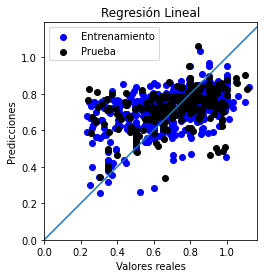

In [20]:
#Se grafican las predicciones utilizando los datos de entrada de entrenamiento y prueba
plt.scatter(yr_train, yr_rl_pred_train,color="b", label='Entrenamiento')
plt.scatter(yr_test, yr_rl_pred_test,color="k", label='Prueba')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.axis('equal')
plt.axis('square')
plt.legend(loc="upper left")
plt.title("Regresión Lineal")
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

## Regresión Red Neuronal

In [21]:
# Importacion de librerias TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
print(tf.__version__)

2.9.1


In [22]:
#Se define y compila el modelo con dos capas intermedias
model_rrn = Sequential([
Dense(64, activation='relu', input_shape=[Xr_train.shape[1]]),
Dense(128, activation='relu'),
Dense(64, activation='relu'),
Dense(1)
])

model_rrn.compile(loss='mse',
                  optimizer='adam',
                  metrics=['mae','mse'])

In [23]:
#Se muestra el resumen del modelo
model_rrn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 17,345
Trainable params: 17,345
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Se define una función que muestra el proceso de entrenamiento imprimiendo un punto después de cada epoch completado
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

#Se entrena el modelo dentro de una variable para su uso posterior
history = model_rrn.fit(Xr_train, yr_train, epochs=50, validation_split = 0.2, verbose=0, callbacks=[PrintDot()])


..................................................

In [25]:
#Se obtienen los valores de las métricas por cada epoch del entrenamiento del modelo y se muestran los últimos
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail(5)

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
45,0.010987,0.066954,0.010987,0.021711,0.102465,0.021711,45
46,0.010581,0.065646,0.010581,0.020204,0.097711,0.020204,46
47,0.010756,0.067780,0.010756,0.020846,0.095150,0.020846,47
48,0.011492,0.070486,0.011492,0.021164,0.099125,0.021164,48
49,0.011189,0.066775,0.011189,0.023780,0.111634,0.023780,49


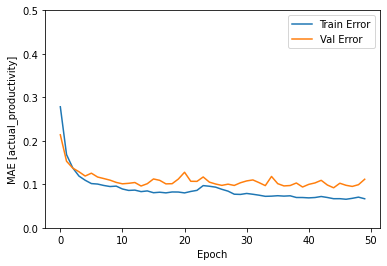

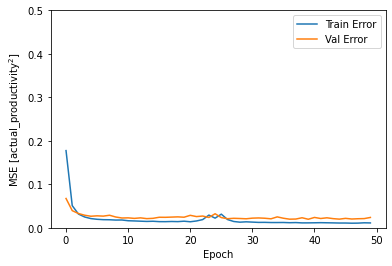

In [26]:
#Se define una función y se pasan las métricas para ser graficadas y observar su evolución con cada epoch
def plot_history(history):

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('MAE [actual_productivity]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,0.5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('MSE [actual_productivity$^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,0.5])
  plt.legend()
  plt.show()

#Se llama a la función sobre el modelo
plot_history(history)

In [27]:
#Se extraen las métricas evualuando el modelo con los conjuntos de entrenamiento prueba y se imprime la métrica de interés
loss, mae, mse_rrn_train = model_rrn.evaluate(Xr_train, yr_train, verbose=2)
print('Error de entrenamiento en Red Neuronal (MSE): {:5.4f} actual_productivity'.format(mse_rrn_train))

loss, mae, mse_rrn_test = model_rrn.evaluate(Xr_test, yr_test, verbose=2)
print("Error de prueba en Red Neuronal (MSE): {:5.4f} actual_productivity".format(mse_rrn_test))

29/29 - 0s - loss: 0.0138 - mae: 0.0779 - mse: 0.0138 - 109ms/epoch - 4ms/step
Error de entrenamiento en Red Neuronal (MSE): 0.0138 actual_productivity
10/10 - 0s - loss: 0.0244 - mae: 0.1074 - mse: 0.0244 - 63ms/epoch - 6ms/step
Error de prueba en Red Neuronal (MSE): 0.0244 actual_productivity


10/10 [==============================] - 0s 3ms/step


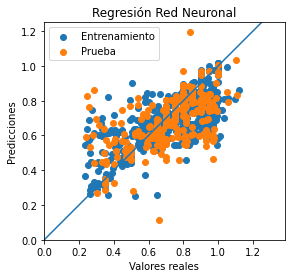

In [28]:
#Se calculan y grafican las predicciones utilizando los datos de entrada de entrenamiento y prueba
yr_rn_pred_train = model_rrn.predict(Xr_train)
yr_rn_pred_test = model_rrn.predict(Xr_test)
plt.scatter(yr_train, yr_rn_pred_train, label='Entrenamiento')
plt.scatter(yr_test, yr_rn_pred_test, label='Prueba')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.axis('equal')
plt.axis('square')
plt.legend(loc = "upper left")
plt.title("Regresión Red Neuronal")
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

## Evaluación comparativa del desempeño

In [29]:
#Se muestra una tabla comparativa con los valores de error de los modelos a partir de los datos de prueba
df_regr=pd.DataFrame({'MSE Regresion Lineal':[mse_rl_test],'MSE Regresión DNN':[mse_rrn_test]})
df_regr

,MSE Regresion Lineal,MSE Regresión DNN
0,0.026863,0.024417


In [30]:
#Se genera y muestra un DataFrame con los valores de las predicciones hechos con regresión lineal y con red neuronal
df_regr_pred=yr_test.copy()
df_regr_pred['RL Pred Productivity']=yr_rl_pred_test
df_regr_pred['RN Pred Productivity']=yr_rn_pred_test
df_regr_pred.sample(6)

,actual_productivity,RL Pred Productivity,RN Pred Productivity
120,0.800000,0.704069,0.778149
492,0.500567,0.568734,0.490843
694,0.900632,0.815144,0.884151
10,0.721127,0.682138,0.658902
1007,0.806879,0.697081,0.756586
646,0.771583,0.764876,0.593575
